In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('datasets/data_orders.csv')
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [85]:
len(df)

10716

# Question 1

In [86]:
df.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


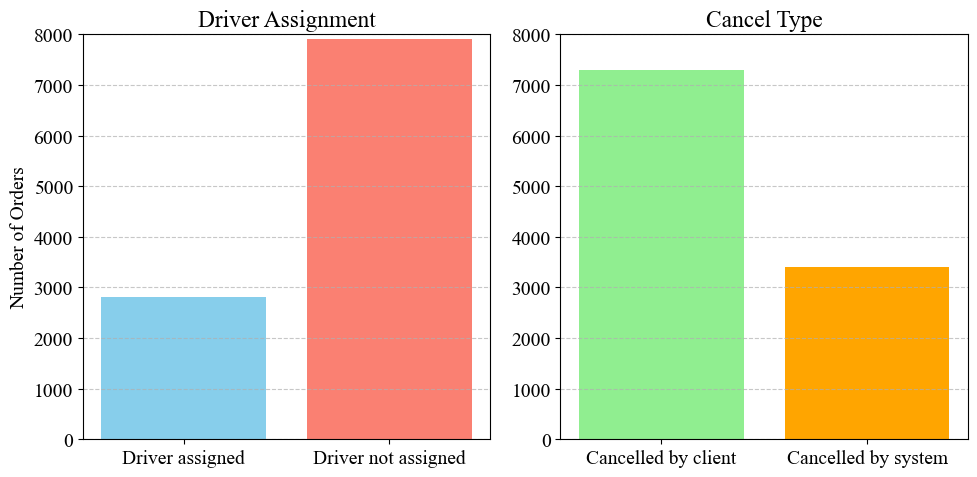

In [87]:
from matplotlib import pyplot as plt
plt.rc('font',family='Times New Roman', size=14)
## Plot 1: cancellations before and after driver assignment
## Plot 2: reasons for order rejection

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
num_driver_assigned = df['is_driver_assigned_key'].sum()
num_driver_not_assigned = len(df) - num_driver_assigned
axes[0].bar(['Driver assigned', 'Driver not assigned'], [num_driver_assigned, num_driver_not_assigned], color=['skyblue', 'salmon'])
axes[0].set_title('Driver Assignment')
axes[0].set_ylabel('Number of Orders')

num_cancelled_by_client = (df['order_status_key'] == 4).sum()
num_cancelled_by_system = len(df) - num_cancelled_by_client
axes[1].bar(['Cancelled by client', 'Cancelled by system'], [num_cancelled_by_client, num_cancelled_by_system], color=['lightgreen', 'orange'])
axes[1].set_title('Cancel Type')

# Set a shared y-axis
max_y = max(num_driver_assigned, num_driver_not_assigned, num_cancelled_by_client, num_cancelled_by_system)
for ax in axes:
    ax.set_ylim(0, max_y + 100)  # Add some padding for better visualization
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Reasons_for_Failures.svg", bbox_inches="tight")
plt.show()


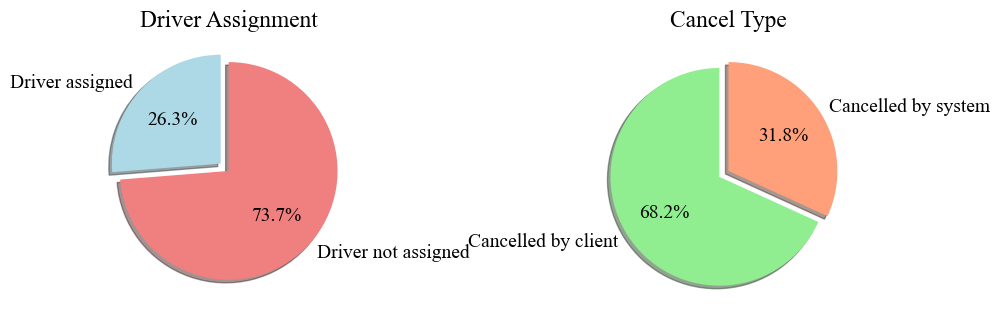

In [88]:
# Data
num_driver_assigned = df['is_driver_assigned_key'].sum()
num_driver_not_assigned = len(df) - num_driver_assigned
num_cancelled_by_client = (df['order_status_key'] == 4).sum()
num_cancelled_by_system = len(df) - num_cancelled_by_client

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Beautified pie plot for driver assignment
axes[0].pie([num_driver_assigned, num_driver_not_assigned], labels=['Driver assigned', 'Driver not assigned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'], explode=(0.1, 0), shadow=True)
axes[0].set_title('Driver Assignment')

# Beautified pie plot for cancellation reasons
axes[1].pie([num_cancelled_by_client, num_cancelled_by_system], labels=['Cancelled by client', 'Cancelled by system'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightsalmon'], explode=(0.1, 0), shadow=True)
axes[1].set_title('Cancel Type')

plt.tight_layout()
plt.savefig("Reasons_for_Failures(Pie).svg", bbox_inches='tight')
plt.show()


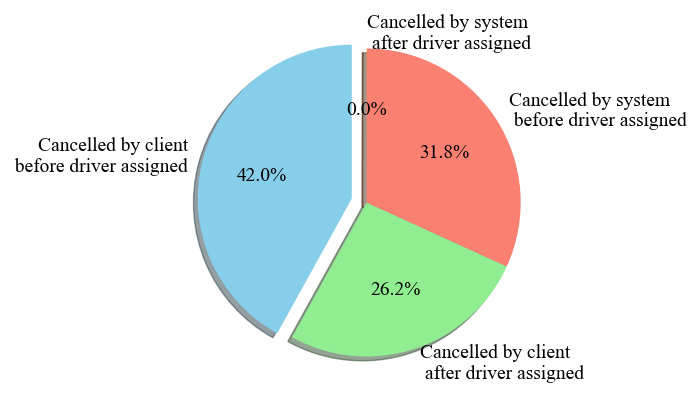

In [89]:
num_cancelled_by_client_before_driver_assigned = ((df['order_status_key'] == 4) & (df['is_driver_assigned_key'] == 0)).sum()
num_cancelled_by_client_after_driver_assigned = ((df['order_status_key'] == 4) & (df['is_driver_assigned_key'] == 1)).sum()
num_cancelled_by_system_before_driver_assigned = ((df['order_status_key'] == 9) & (df['is_driver_assigned_key'] == 0)).sum()
num_cancelled_by_system_after_driver_assigned = ((df['order_status_key'] == 9) & (df['is_driver_assigned_key'] == 1)).sum()

labels = ['Cancelled by client\n before driver assigned', 
          'Cancelled by client\n after driver assigned', 
          'Cancelled by system\n before driver assigned', 
          'Cancelled by system\n after driver assigned']

sizes = [num_cancelled_by_client_before_driver_assigned, 
         num_cancelled_by_client_after_driver_assigned, 
         num_cancelled_by_system_before_driver_assigned, 
         num_cancelled_by_system_after_driver_assigned]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'], explode=(0.1, 0, 0, 0), shadow=True)
plt.savefig("Reasons_for_Failures(Pie2).svg", bbox_inches='tight')
plt.show()

# Question 2

In [90]:
from tqdm import tqdm
tqdm.pandas()
df["Hour"] = df['order_datetime'].progress_apply(lambda x: int(x.split(':')[0]))
df["Hour"]

100%|██████████| 10716/10716 [00:00<00:00, 258289.01it/s]


0        18
1        20
2        12
3        13
4        21
         ..
10711    13
10712    13
10713    13
10714    13
10715    11
Name: Hour, Length: 10716, dtype: int64

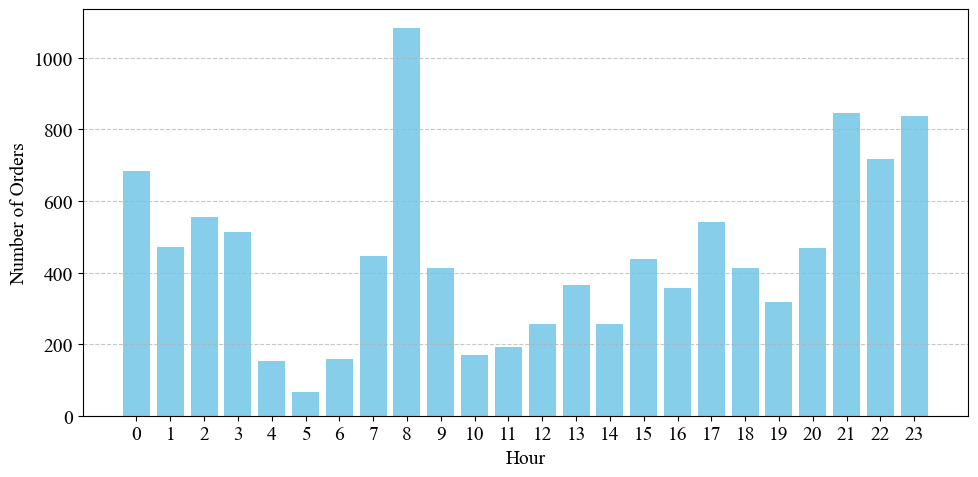

In [91]:
# Data
hourly_orders = df['Hour'].value_counts().sort_index()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(hourly_orders.index, hourly_orders, color='skyblue')

# Beautify the plot
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Orders')
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.savefig("Hourly_Distribution_of_Failed_Orders.svg", bbox_inches='tight')
plt.show()


In [92]:
## Assign the reasons to the df:
# 0 - cancelled_by_client_before_driver_assigned
# 1 - cancelled_by_client_after_driver_assigned
# 2 - cancelled_by_system_before_driver_assigned
# 3 - cancelled_by_system_after_driver_assigned
df['cancel_reason'] = 0

df.loc[(df['order_status_key'] == 4) & (df['is_driver_assigned_key'] == 0), 'cancel_reason'] = 0
df.loc[(df['order_status_key'] == 4) & (df['is_driver_assigned_key'] == 1), 'cancel_reason'] = 1
df.loc[(df['order_status_key'] == 9) & (df['is_driver_assigned_key'] == 0), 'cancel_reason'] = 2
df.loc[(df['order_status_key'] == 9) & (df['is_driver_assigned_key'] == 1), 'cancel_reason'] = 3

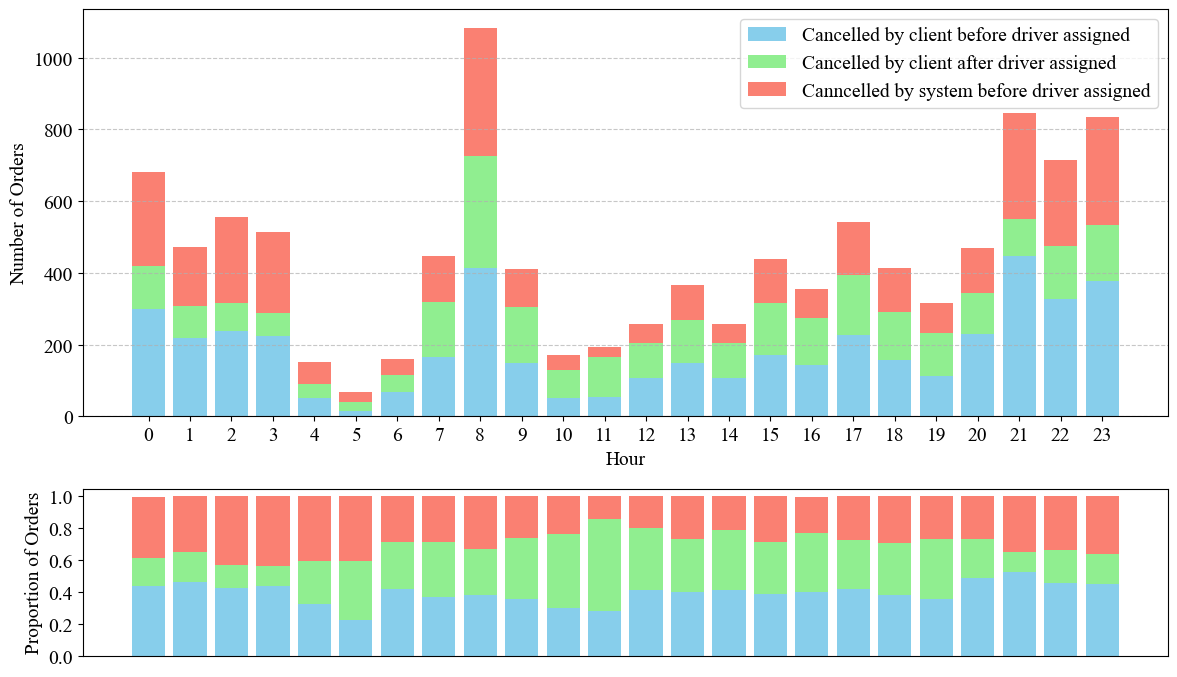

In [93]:
# Create the plot
grid = plt.GridSpec(3, 1)
plt.figure(figsize=(12,7))

hourly_orders_0 = df[df['cancel_reason'] == 0]['Hour'].value_counts().sort_index()
hourly_orders_1 = df[df['cancel_reason'] == 1]['Hour'].value_counts().sort_index()
hourly_orders_2 = df[df['cancel_reason'] == 2]['Hour'].value_counts().sort_index()
hourly_orders_3 = df[df['cancel_reason'] == 3]['Hour'].value_counts().sort_index()

ax = plt.subplot(grid[0:2])
ax.bar(hourly_orders_0.index, hourly_orders_0, color='skyblue')
ax.bar(hourly_orders_1.index, hourly_orders_1, bottom=hourly_orders_0, color='lightgreen')
ax.bar(hourly_orders_2.index, hourly_orders_2, bottom=hourly_orders_0 + hourly_orders_1, color='salmon')
# ax.bar(hourly_orders_3.index, hourly_orders_3, bottom=hourly_orders_0 + hourly_orders_1 + hourly_orders_2, color='orange')

# Beautify the plot
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Orders')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(["Cancelled by client before driver assigned", "Cancelled by client after driver assigned", "Canncelled by system before driver assigned"], loc='upper right')
ax.set_xticks(range(0, 24))

ax2 = plt.subplot(grid[2])
hourly_orders_proportion_0 = hourly_orders_0 / hourly_orders
hourly_orders_proportion_1 = hourly_orders_1 / hourly_orders
hourly_orders_proportion_2 = hourly_orders_2 / hourly_orders
hourly_orders_proportion_3 = hourly_orders_3 / hourly_orders

ax2.bar(hourly_orders_proportion_0.index, hourly_orders_proportion_0, color='skyblue')
ax2.bar(hourly_orders_proportion_1.index, hourly_orders_proportion_1, bottom=hourly_orders_proportion_0, color='lightgreen')
ax2.bar(hourly_orders_proportion_2.index, hourly_orders_proportion_2, bottom=hourly_orders_proportion_0 + hourly_orders_proportion_1, color='salmon')

ax2.set_xticks([])
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_ylabel('Proportion of Orders')

plt.tight_layout()
plt.savefig("Hourly_Distribution_of_Failed_Orders(Stacked).svg", bbox_inches='tight')
plt.show()

C:\Users\qypyt\AppData\Local\Temp\ipykernel_4352\849244979.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


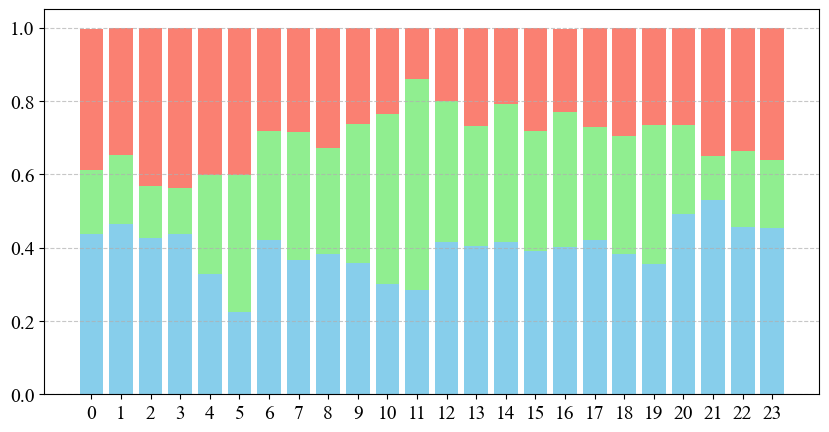

In [94]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

hourly_orders_proportion_0 = hourly_orders_0 / hourly_orders
hourly_orders_proportion_1 = hourly_orders_1 / hourly_orders
hourly_orders_proportion_2 = hourly_orders_2 / hourly_orders
hourly_orders_proportion_3 = hourly_orders_3 / hourly_orders

ax.bar(hourly_orders_proportion_0.index, hourly_orders_proportion_0, color='skyblue')
ax.bar(hourly_orders_proportion_1.index, hourly_orders_proportion_1, bottom=hourly_orders_proportion_0, color='lightgreen')
ax.bar(hourly_orders_proportion_2.index, hourly_orders_proportion_2, bottom=hourly_orders_proportion_0 + hourly_orders_proportion_1, color='salmon')
# ax.bar(hourly_orders_3.index, hourly_orders_3, bottom=hourly_orders_0 + hourly_orders_1 + hourly_orders_2, color='orange')

# Beautify the plot
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(range(0, 24))

fig.show()

# Question 3

In [95]:
## To detect the outliers, we can use the z-score method
from scipy.stats import zscore
df['zscore'] = zscore(df['cancellations_time_in_seconds'], nan_policy='omit')
df['is_outlier'] = (df['zscore'] > 3) | (df['zscore'] < -3)
print(df['is_outlier'].value_counts())

is_outlier
False    10572
True       144
Name: count, dtype: int64


In [96]:
average_caceltime_with_driver_by_hour = df[(df['is_driver_assigned_key'] == 1) & (df['is_outlier'] == False)].groupby('Hour')['cancellations_time_in_seconds'].mean()
average_caceltime_without_driver_by_hour = df[(df['is_driver_assigned_key'] == 0) & (df['is_outlier'] == False)].groupby('Hour')['cancellations_time_in_seconds'].mean()
average_caceltime_by_hour = df[df['is_outlier'] == False].groupby('Hour')['cancellations_time_in_seconds'].mean()


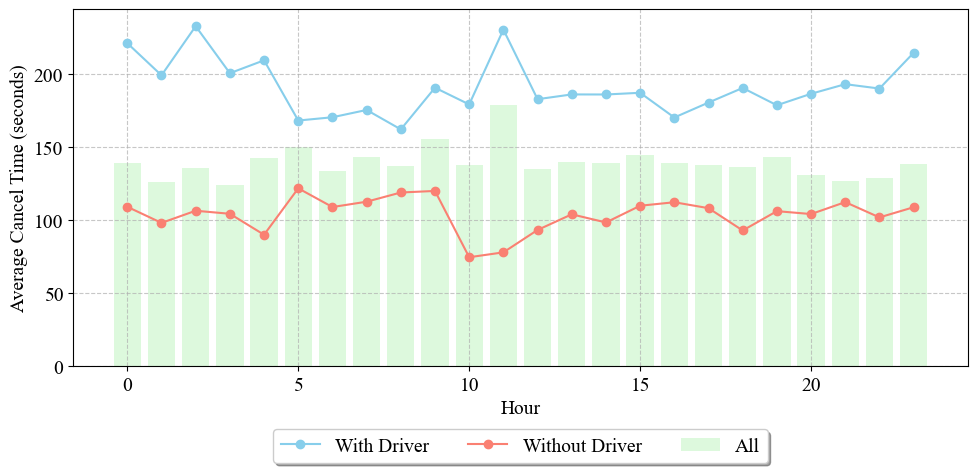

In [97]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
ax.plot(average_caceltime_with_driver_by_hour.index, average_caceltime_with_driver_by_hour, marker='o', label='With Driver', color='skyblue')
ax.plot(average_caceltime_without_driver_by_hour.index, average_caceltime_without_driver_by_hour, marker='o', label='Without Driver', color='salmon')
ax.bar(average_caceltime_by_hour.index, average_caceltime_by_hour, label='All', color='lightgreen', alpha=0.3)

# Beautify the plot
ax.set_xlabel('Hour')
ax.set_ylabel('Average Cancel Time (seconds)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Average_Cancellation_Time_by_Hour.svg", bbox_inches='tight')
plt.show()


# Question 4

In [98]:
df["m_order_eta"].describe()

count    2814.000000
mean      441.415423
std       288.006379
min        60.000000
25%       233.000000
50%       368.500000
75%       653.000000
max      1559.000000
Name: m_order_eta, dtype: float64

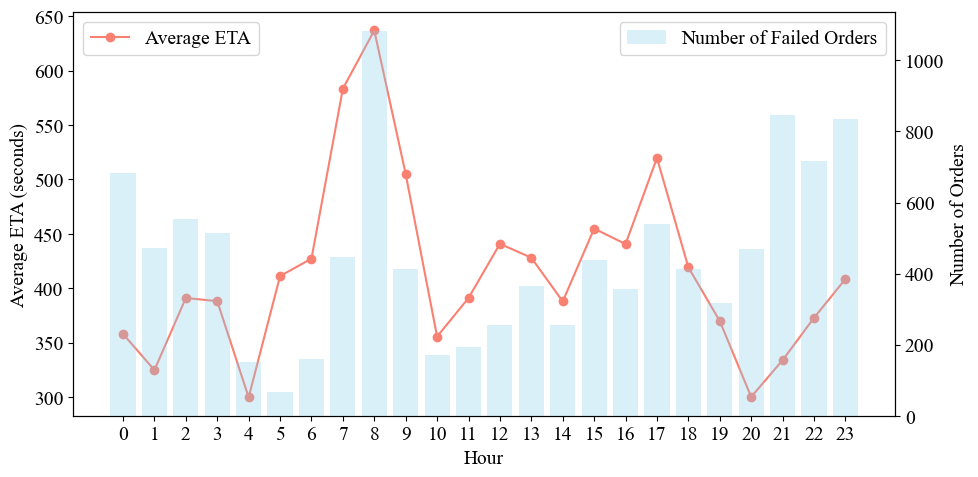

In [99]:
eta_by_hour = df.groupby('Hour')['m_order_eta'].mean()

fig, ax = plt.subplots(figsize=(10, 5))

ax1 = ax.twinx()
ax.plot(eta_by_hour.index, eta_by_hour, marker='o', color='salmon', label='Average ETA')
ax1.bar(hourly_orders.index, hourly_orders, color='skyblue', alpha=0.3, label='Number of Failed Orders')

ax.set_xlabel('Hour')
ax.set_ylabel('Average ETA (seconds)')
ax1.set_ylabel('Number of Orders')
ax.set_xticks(range(0, 24))
ax.legend(loc='upper left')
ax1.legend(loc='upper right')

plt.tight_layout()
plt.savefig("Average_ETA_by_Hours.svg", bbox_inches="tight")
plt.show()

# Question 5

In [100]:
## Check if there is none in origin_longitude and origin_latitude
print(df['origin_longitude'].isnull().sum())
print(df['origin_latitude'].isnull().sum())

0
0


In [101]:
import h3
import folium

# Convert latitude and longitude to H3 hexagons
def get_hex(row):
    return h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], resolution=8)

df['hex_id'] = df.apply(get_hex, axis=1)

In [102]:
df['origin_longitude'].describe()

count    10716.000000
mean        -0.964323
std          0.022818
min         -1.066957
25%         -0.974363
50%         -0.966386
75%         -0.949605
max         -0.867088
Name: origin_longitude, dtype: float64

In [103]:
# Count orders within hexagons
hex_counts = df['hex_id'].value_counts().reset_index()
hex_counts.columns = ['hex_id', 'order_count']
hex_counts.head()

,hex_id,order_count
0,88195d2b1dfffff,1497
1,88195d2b1bfffff,870
2,88195d2b15fffff,774
3,88195d2b11fffff,707
4,88195d2b19fffff,667


In [104]:
# Sort hexagons by order count
hex_counts = hex_counts.sort_values(by='order_count', ascending=False)

# Calculate cumulative percentage of orders
hex_counts['cumulative_percentage'] = hex_counts['order_count'].cumsum() / hex_counts['order_count'].sum()

# Select hexagons containing 80% of orders
selected_hexes = hex_counts[hex_counts['cumulative_percentage'] < 0.8]
additional_hexes = hex_counts[hex_counts['cumulative_percentage'] >= 0.8].iloc[[0]]

selected_hexes = pd.concat([selected_hexes, additional_hexes])

print("The number of hexagons with resolution 8 containing 80% of orders:", len(selected_hexes))

selected_hexes.head()

The number of hexagons with resolution 8 containing 80% of orders: 24


,hex_id,order_count,cumulative_percentage
0,88195d2b1dfffff,1497,0.139698
1,88195d2b1bfffff,870,0.220885
2,88195d2b15fffff,774,0.293113
3,88195d2b11fffff,707,0.359089
4,88195d2b19fffff,667,0.421333


In [105]:
import matplotlib
import folium
from geojson import Feature, Point, FeatureCollection
import json

def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "value"):
    """
    Produce the GeoJSON for a dataframe, constructing the geometry from the "hex_id" column
    and with a property matching the one in column_name
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row["hex_id"],geo_json=True)]}
            feature = Feature(geometry = geometry_for_row , id=row["hex_id"], properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["hex_id"]) 

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

def get_color(custom_cm, val, vmin, vmax):
    return matplotlib.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

def choropleth_map(df_aggreg, column_name = "value", border_color = 'black', fill_opacity = 0.7, color_map_name = "Blues", initial_map = None):
    """
    Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
    """    
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    print(f"Colour column min value {min_value}, max value {max_value}, mean value {mean_value}")
    print(f"Hexagon cell count: {df_aggreg['hex_id'].nunique()}")
    
    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)
    
    if initial_map is None:
        initial_map = folium.Map(location= [47, 4], zoom_start=5.5, tiles="cartodbpositron")

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)

    # color_map_name 'Blues' for now, many more at https://matplotlib.org/stable/tutorials/colors/colormaps.html to choose from!
    custom_cm = matplotlib.cm.get_cmap(color_map_name)

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)

    return initial_map

In [106]:
m = choropleth_map(selected_hexes, column_name = "order_count")
    
m.save("Hexagons_Containing_80_Percent_of_Orders.html")
m

Colour column min value 81, max value 1497, mean value 359.75
Hexagon cell count: 24


C:\Users\qypyt\AppData\Local\Temp\ipykernel_4352\3172595509.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cm = matplotlib.cm.get_cmap(color_map_name)
